## Imports

In [1]:
from numpy import load
import numpy as np
import time 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

## Load Data

In [2]:
ag2l = load('/Users/krol/research/Summer2022/Inversion Benchmark Files/ag1000g_2L_gambiae_full.npz')
counts = ag2l['allele_counts']
pos = ag2l['positions']
mask = ag2l['mask']

In [3]:
print("Allele_Counts ", counts, counts.shape)
print("Positions ", pos, pos.shape)
print("Mask ", mask, mask.shape)

Allele_Counts  [[0. 1. 1. ... 1. 1. 0.]
 [0. 2. 2. ... 0. 0. 1.]
 [0. 2. 2. ... 0. 0. 0.]
 ...
 [0. 2. 2. ... 0. 0. 0.]
 [0. 2. 2. ... 0. 0. 0.]
 [0. 2. 2. ... 1. 1. 0.]] (81, 596189)
Positions  [   44889    50387   157120 ... 49356239 49356248 49356406] (596189,)
Mask  [0. 0. 0. ... 0. 0. 0.] (596189,)


In [4]:
def populating_window():
    populate_windows_list = []
    for idx, p in enumerate(pos):
        populate_windows_list.insert(p, counts[:, idx])
       # (counts[:, idx])
    return populate_windows_list

In [5]:
def creating_mask():
    #looping through all of the columns to create a new mask
    #Creating this mask by getting the most frequent number of that particular column
    mask_ = []
    for idx, snp in enumerate(pos):
        el, count = np.unique(counts[:,idx], return_counts=True)
        mask_.insert(snp, el[np.argmax(count)])
    return mask_

### Debugging and Running Top Two Methods

In [6]:
%%time
pop = populating_window()

CPU times: user 150 ms, sys: 11.7 ms, total: 162 ms
Wall time: 161 ms


In [7]:
print(len(pop))
print(len(pop[0]))

596189
81


In [8]:
%%time 
mask_ = creating_mask()

CPU times: user 8.17 s, sys: 45.5 ms, total: 8.22 s
Wall time: 8.21 s


In [9]:
print(len(mask_))

596189


### Setting Up Sliding Window

In [10]:
def sliding_window():
    updated_window_list = []
    mask_for_updated_list = []
    kernel_size = 10
    for y in range(0, len(pop), kernel_size):
        updated_window_list.append(pop[y:y+kernel_size+1])
        mask_for_updated_list.append(mask_[y:kernel_size])
    return np.array(updated_window_list), np.array(mask_for_updated_list)

In [11]:
updated_window, updated_mask = sliding_window()

/var/folders/x6/k_t97_rs6vlg4t8lsgz94z1r0000gn/T/ipykernel_2470/2367289187.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(updated_window_list), np.array(mask_for_updated_list)


In [16]:
updated_window = np.array(updated_window)
updated_mask = np.array(updated_mask)

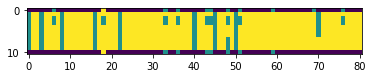

In [18]:
plt.imshow(updated_window[0])

## Plotting The Updated_Windows

## Navie Way of Getting the Matrixs with Positive and Negative Numbers

In [12]:
window_pos = []
window_neg = []

In [13]:
for i in updated_window:
    if -1 in i:
        window_neg.append(i)
    else:
        window+pos.append(i) 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()